In [10]:
#!pip install yfinance --upgrade --no-cache-dir


In [11]:
#!pip install python-bcb

In [12]:
#Análise de Dados econômicos usando diferentes bases de dados#

#Importando as bibliotecas necessárias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
today = date.today()

import pandas_datareader.data as web
import yfinance as yf
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.\n
#1.1.2 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
import bcb 
from bcb import sgs

In [13]:
#Base de dados do banco do Brasil usando API

def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df
    

            IPCA
Date            
1998-01-01  0.71
1998-02-01  0.46
1998-03-01  0.34
1998-04-01  0.24
1998-05-01  0.50
...          ...
2022-08-01 -0.36
2022-09-01 -0.29
2022-10-01  0.59
2022-11-01  0.41
2022-12-01  0.62

[300 rows x 1 columns]


<AxesSubplot: xlabel='Date'>

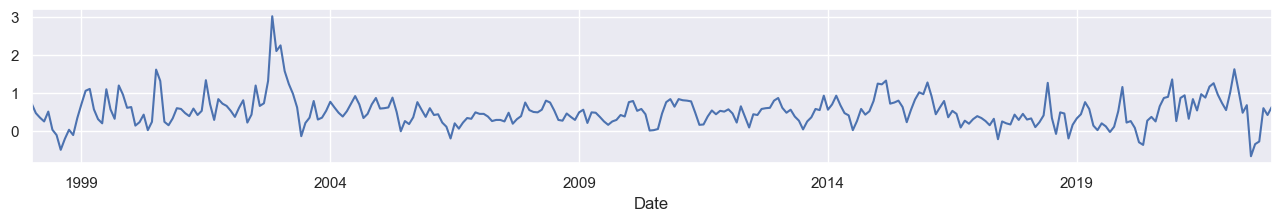

In [70]:
#Importando dados usando a biblioteca BCB
ipca2 = sgs.get(('IPCA', 433), last=300)
print(ipca2)
ipca2['IPCA'].plot(figsize=(16,2))

In [71]:
#Percorrendo a base de dados do Yahoo
yf.pdr_override()
# E com o comando web.get_data_yahoo podemos ter os dados históricos da bovespa
# ÍNDICES BRASILEIROS
ibov = web.get_data_yahoo('^BVSP', start='2000-11-03')
ifix = web.get_data_yahoo('IFIX.SA', start='2000-01-01')
#ÍNDICES AMERICANOS
sp500 = web.get_data_yahoo('^GSPC', start='2000-01-01')
#COMMODITIES
crudeoil = web.get_data_yahoo('CL=F', start='2000-01-01')
gold = web.get_data_yahoo('GC=F', start='2000-01-01')
#CRIPTOMOEDAS
btcusd = web.get_data_yahoo('BTC-USD', start=datetime.datetime(2019,1,1), end=today)
# RENDA FIXA BR & INDICES DE INFLAÇÃO BR
ipca = sgs.get(('IPCA', 433), last=12*365)
igpm = sgs.get(('IGPM', 189), last=12)
selic_meta = sgs.get(('SELIC_META', 432), last=12*365)
selic = sgs.get(('SELIC', 1178), last= 12)
reservas_internacionais = sgs.get(('RESERVAS INT', 13621), last=12)
cdi = sgs.get(('CDI', 12), last=(12*365))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
print(btcusd)

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2023-01-08  16954.146484  17091.144531  16924.050781  17091.144531   
2023-01-09  17093.992188  17389.957031  17093.992188  17196.554688   
2023-01-10  17192.949219  17484.720703  17162.990234  17446.292969   
2023-01-11  17446.359375  17934.896484  17337.994141  17934.896484   
2023-01-12  18117.593750  19030.087891  17995.203125  18869.587891   

               Adj Close       Volume  
Date                                   
2019-01-0

                 CDI
Date                
2005-08-04  0.071382
2005-08-05  0.071349
2005-08-08  0.071349
2005-08-09  0.071316
2005-08-10  0.071316
...              ...
2023-01-06  0.050788
2023-01-09  0.050788
2023-01-10  0.050788
2023-01-11  0.050788
2023-01-12  0.050788

[4380 rows x 1 columns]


<AxesSubplot: xlabel='Date'>

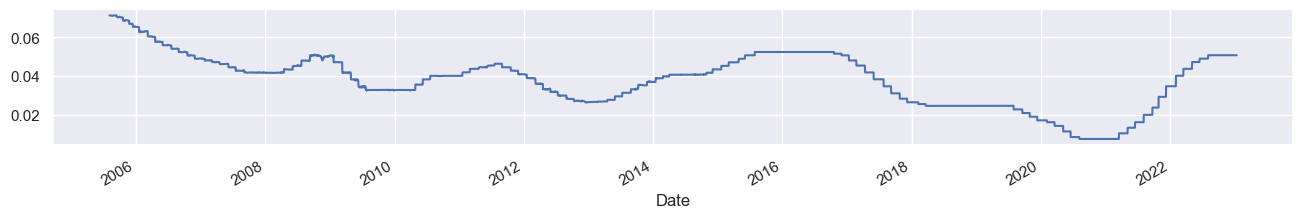

In [17]:
print(cdi)
cdi['CDI'].plot(figsize=(16,2))

<AxesSubplot: xlabel='Date'>

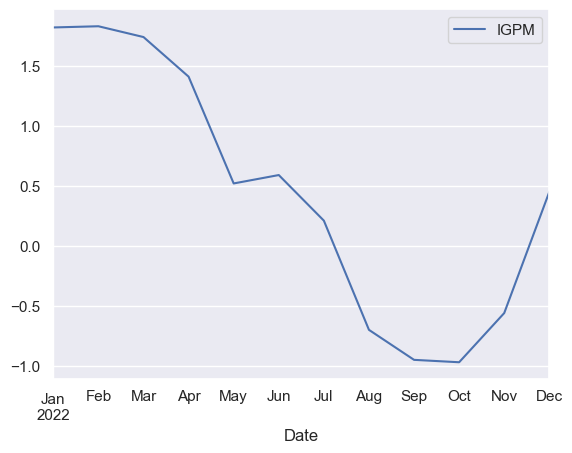

In [72]:
igpm.plot()

<AxesSubplot: xlabel='Date'>

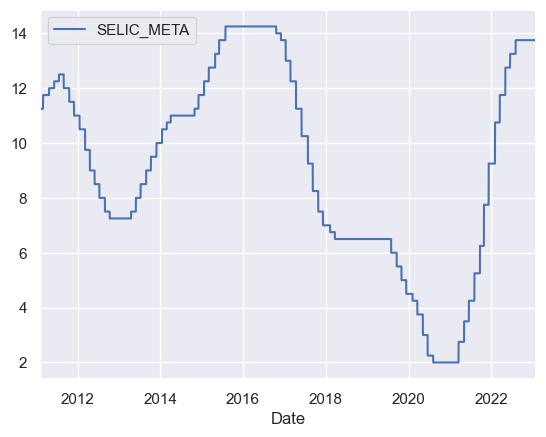

In [19]:
selic_meta.plot()

<AxesSubplot: xlabel='Date'>

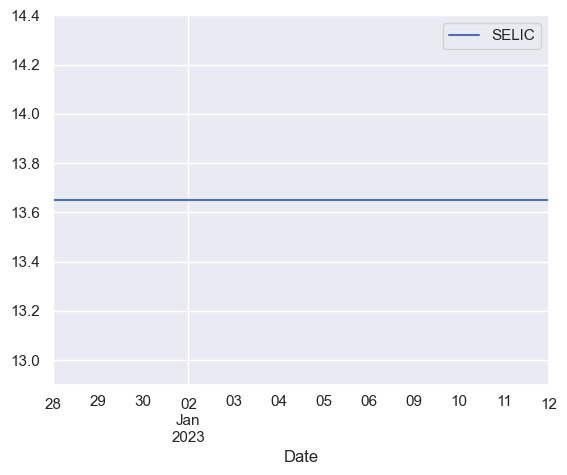

In [73]:
selic.plot()

<AxesSubplot: xlabel='Date'>

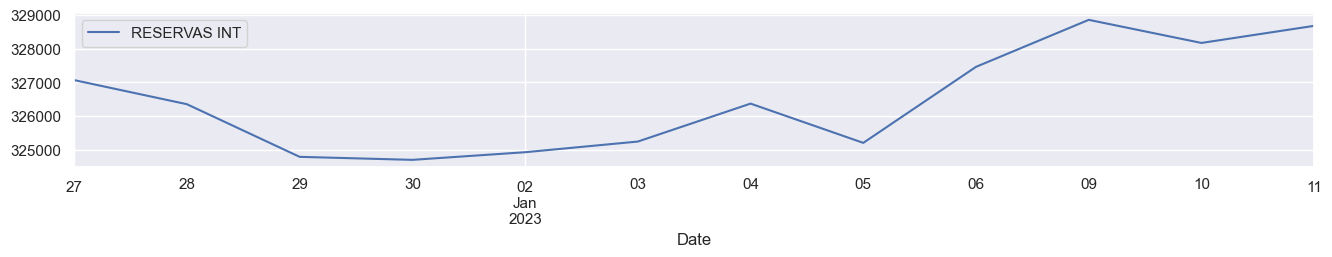

In [21]:
reservas_internacionais.plot(figsize=(16,2))

Text(0, 0.5, 'Valor do índice')

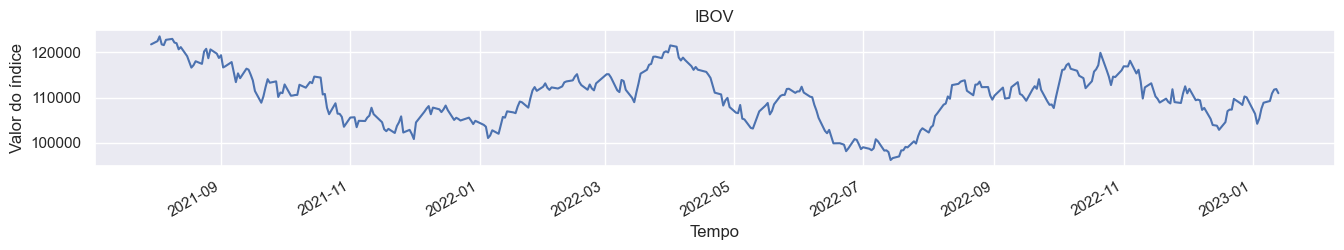

In [74]:
ibov['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('IBOV')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

In [23]:
ibov.tail(7) 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-05,105336.00000,107743.000000,105333.000000,107518.000000,107518.000000,15512000
2023-01-06,107642.00000,109433.000000,107642.000000,108836.000000,108836.000000,12626600
2023-01-09,108964.00000,109938.000000,108134.000000,109227.000000,109227.000000,12047300
2023-01-10,109129.00000,111193.000000,108478.000000,110912.000000,110912.000000,13697900
2023-01-11,110816.00000,111841.000000,110752.000000,111763.000000,111763.000000,14461400
2023-01-12,112516.00000,113129.000000,110982.000000,111877.000000,111877.000000,19839100
2023-01-13,111843.46875,111846.710938,110427.640625,110941.929688,110941.929688,0


In [24]:
ibov.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-11-03,14785.0,14925.0,14425.0,14534.0,14534.0,0
2000-11-06,14534.0,14868.0,14478.0,14801.0,14801.0,0
2000-11-07,14780.0,15029.0,14543.0,14969.0,14969.0,0
2000-11-08,14982.0,15191.0,14650.0,14656.0,14656.0,0
2000-11-09,14667.0,14782.0,14409.0,14524.0,14524.0,0
2000-11-10,14542.0,14701.0,14449.0,14626.0,14626.0,0
2000-11-13,14606.0,14609.0,14199.0,14372.0,14372.0,0


Text(0, 0.5, 'BVSP - 15 dias passados')

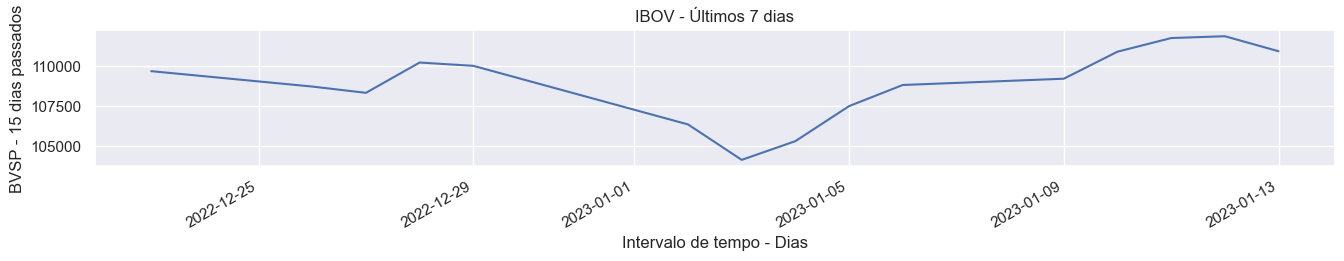

In [25]:
ibov.tail(15)['Adj Close'].plot(figsize=(16,2))
plt.title('IBOV - Últimos 7 dias')
plt.xlabel('Intervalo de tempo - Dias')
plt.ylabel('BVSP - 15 dias passados')

Text(0, 0.5, 'BVSP')

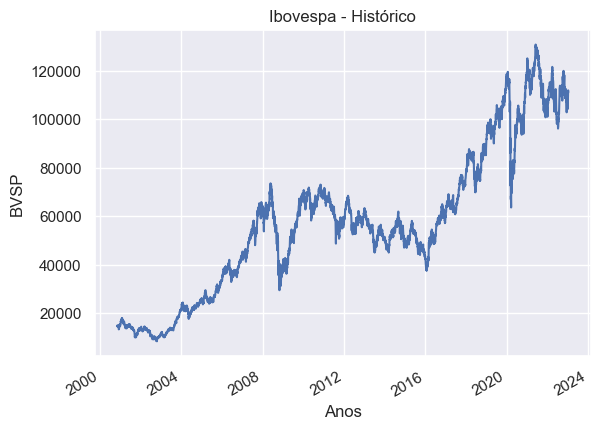

In [26]:
ibov['Close'].plot()
plt.title('Ibovespa - Histórico')
plt.xlabel('Anos')
plt.ylabel('BVSP')

Text(0, 0.5, 'Valor do índice')

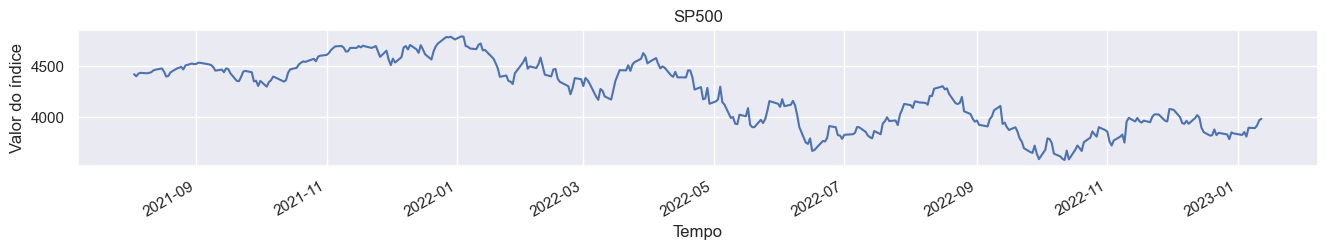

In [27]:
sp500['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('SP500')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

Text(0, 0.5, 'Valor do índice')

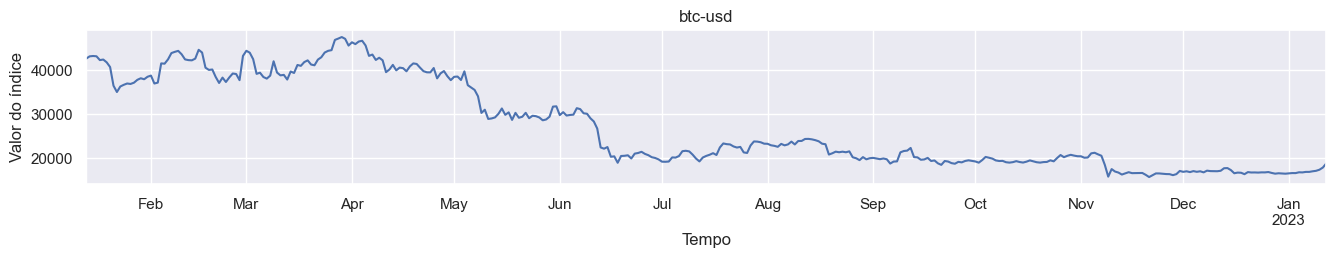

In [28]:
btcusd['Adj Close'].tail(365).plot(figsize=(16,2))
plt.title('btc-usd')
plt.xlabel('Tempo')
plt.ylabel('Valor do índice')

Text(0, 0.5, 'Inflação (%)')

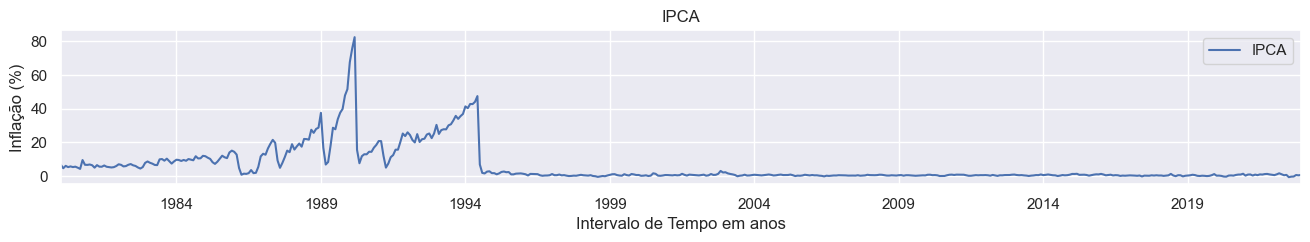

In [49]:
ipca.plot(figsize=(16,2))
plt.title("IPCA")
plt.xlabel('Intervalo de Tempo em anos')
plt.ylabel('Inflação (%)')

In [59]:
#RETORNOS ACUMULADOS
data_inicio = '2000-01-01'
ibovretorno = yf.download(tickers='^BVSP', start=datetime.datetime(2000,1,1))[['Adj Close']]
ibov_retorno = ibovretorno.pct_change()
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1

selic_meta_acumulado = (1 + selic_meta[selic_meta.index >= data_inicio] / 100).cumprod()
selic_meta_acumulado.iloc[0] = 1


[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

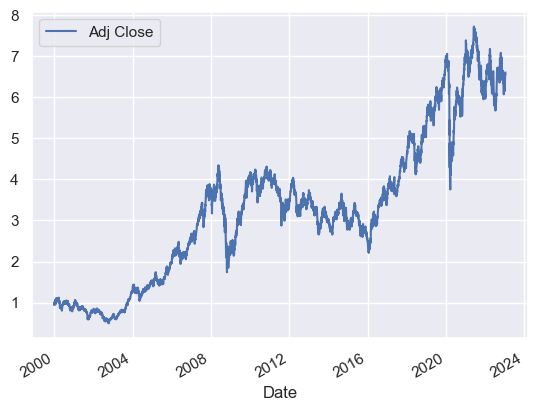

In [75]:
ibov_retorno_acumulado.plot()

<AxesSubplot: xlabel='Date'>

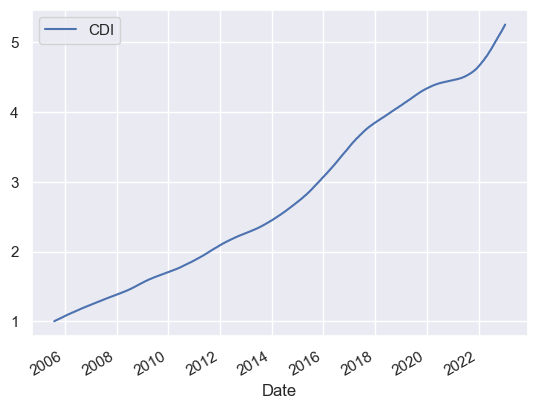

In [76]:
cdi_acumulado.plot()

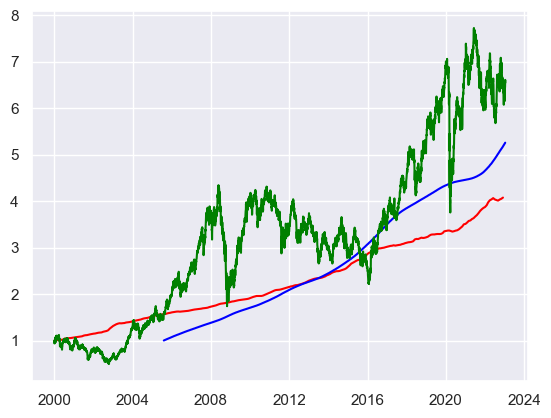

In [78]:
#CDI vs. IPCA

ax = plt.subplot()
ax.plot(ipca_acumulado, color='red')
ax.plot(cdi_acumulado, color='blue')
ax.plot(ibov_retorno_acumulado, color='green')


In [35]:
#VOLATILIDADE
pct_ibov = (ibov.Close/ibov.Open).apply(lambda x:x-1)*100
display(pct_ibov.tail(10))


Date
2023-01-02   -3.060127
2023-01-03   -2.078457
2023-01-04    1.120316
2023-01-05    2.071467
2023-01-06    1.109232
2023-01-09    0.241364
2023-01-10    1.633846
2023-01-11    0.854570
2023-01-12   -0.567919
2023-01-13   -0.806072
dtype: float64

<AxesSubplot: title={'center': 'IBOV Volatilidade - 15d'}, xlabel='Date'>

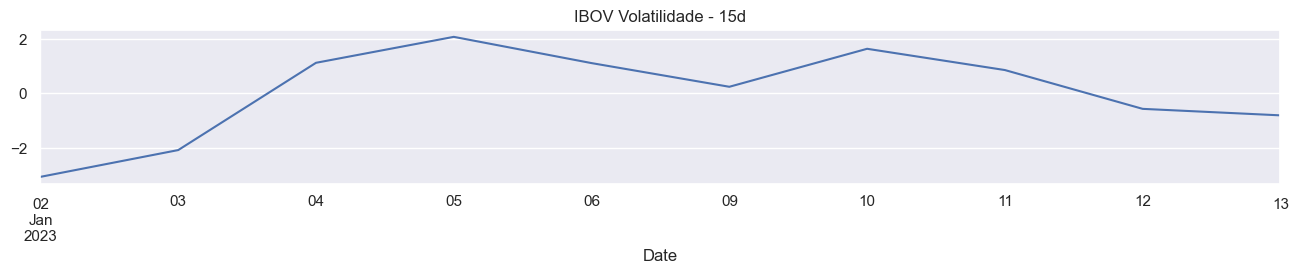

In [36]:
pct_ibov.tail(10).plot(figsize=(16,2), title='IBOV Volatilidade - 15d')

<AxesSubplot: title={'center': 'IBOV Volatilidade - Completo'}, xlabel='Date'>

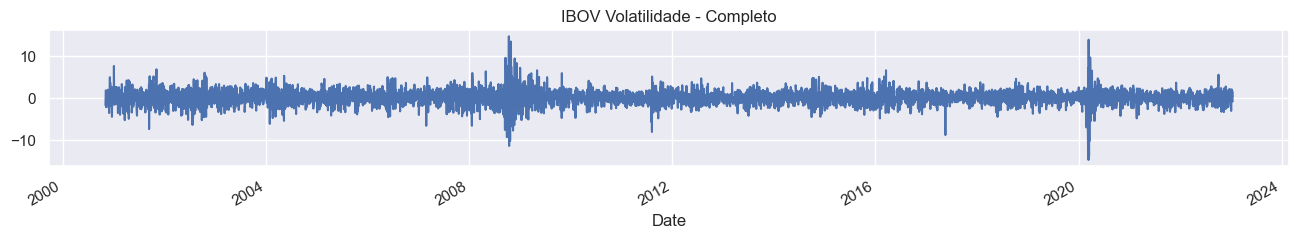

In [37]:
pct_ibov.plot(figsize=(16,2), title='IBOV Volatilidade - Completo')

<AxesSubplot: xlabel='Date'>

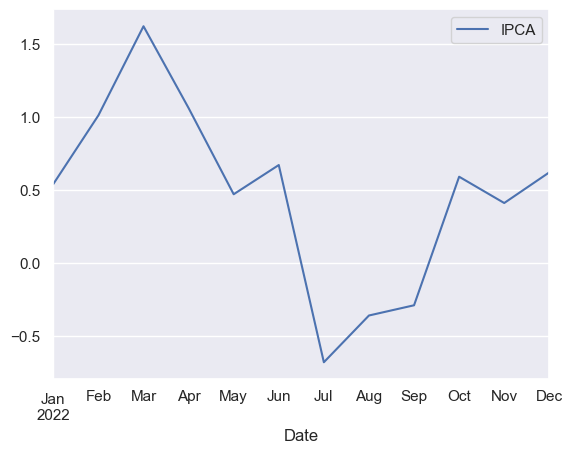

In [38]:
#
ipca2022 = ipca[(ipca.index.year >= 2021)]
ipca2022.plot()

In [39]:
#FILTRO POR MÊS
ibov_fatiado12 = ibov[ibov.index.month == 12]
ibov_fatiado12.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100
2022-12-28,108578.0,110536.0,108578.0,110237.0,110237.0,11193900
2022-12-29,110237.0,111178.0,109560.0,110031.0,110031.0,13389100


In [40]:
# FUNDOS IMOBILIÁRIOS #
habt11 = web.get_data_yahoo('HABT11.SA', start='2020-02-01', end=today)
tgar11 = web.get_data_yahoo('TGAR11.SA', start='2020-02-01', end=today)
xplg11 = web.get_data_yahoo('XPLG11.SA', start='2020-02-01', end=today)
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end=today)
flma11 = web.get_data_yahoo('FLMA11.SA', start='2020-02-01', end=today)
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end=today)
bcff11 = web.get_data_yahoo('BCFF11.SA', start='2020-02-01', end=today)
xpsf11 = web.get_data_yahoo('XPSF11.SA', start='2020-02-01', end=today)
xpci11 = web.get_data_yahoo('XPCI11.SA', start='2020-02-01', end=today)
xpml11 = web.get_data_yahoo('XPML11.SA', start='2020-02-01', end=today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


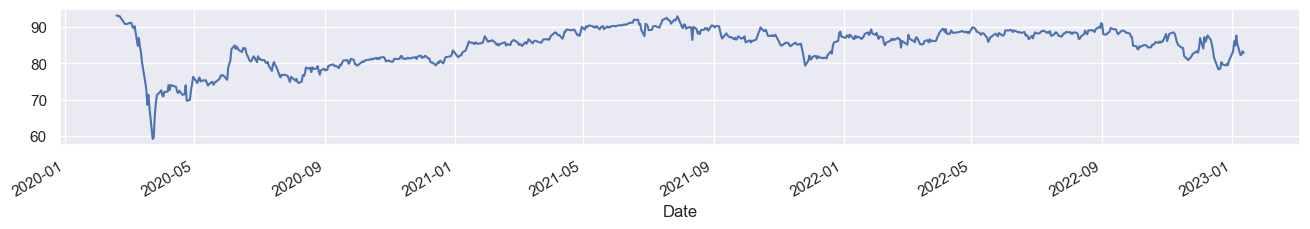

In [41]:
cota_xpci11 = xpci11["Adj Close"].plot(figsize=(16,2), label="xpci11 - cotação")

TypeError: unhashable type: 'DataFrame'

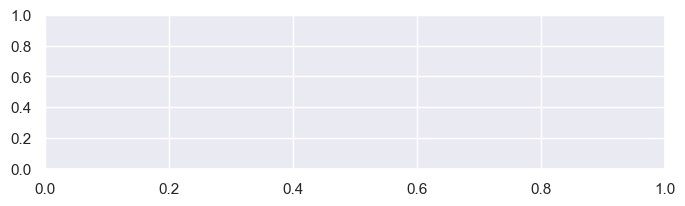

In [42]:
cotabcff11 = bcff11["Adj Close"].plot(figsize=(8,2), label=bcff11)
cotaxpsf11 = xpsf11["Close"].plot(figsize=(8,2), label=xpsf11)
cotamxrf11 = mxrf11["Close"].plot(figsize=(8,2), label=mxrf11)
cotaxplg11 = xplg11["Close"].plot(figsize=(8,2), label=xplg11)
cotaxpci11 = xpci11["Close"].plot(figsize=(8,2), label=xpci11)
cotaknri11 = knri11["Close"].plot(figsize=(8,2), label=knri11)

In [ ]:
# Baixando dados da sobre ITSA4 pelo YF
itsa4 = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2000,1,1), end=datetime.datetime.today())
# Gráfico do fechamento da cota
cota_itsa4 = itsa4["Close"].plot(figsize=(16,2), title='ITSA4')

In [ ]:
#Função lambda da volatilidade
pct_itsa4 = (itsa4.Close/itsa4.Open).apply(lambda x:x-1)*100

display(pct_itsa4.head(10))


In [ ]:
#Gráfico da volatilidade
pct_itsa4.tail(15).plot(figsize=(8,2))

In [ ]:
#CRIAR FUNÇÃO QUE EXECUTA O PROCEDIMENTO DE ANGARIAR O GRÁFICO, A VOLATILIDADE E EXIBIR
# O PARÂMETRO É O TICKER

In [ ]:
#BIBLIOTECA FUNDAMENTOS

fts_itub4 = fts.get_fundamentos('ITUB4')
print(fts_itub4)



In [ ]:
#Puxando uma coluna específica
fts_itub4['Dividendos']


In [ ]:
fts_itub4['Dividendos'].plot()


In [ ]:
for col in fts_itub4.columns:
    print(col)

In [ ]:
 #Todos os fundamentos do primeiro trimestre de 2020,
ftsitub41t20 = fts.get_fundamentos('ITUB4', year=2020, quarter=1)
#Todos os fundamentos dos terceiros trimestres ou de qualquer semestre específico, basta mudar o valor 3 por outro
ftsitub43t = fts.get_fundamentos('ITUB4', quarter=3)

In [ ]:

 
#Fundamentos das empresas em carteira
#Todos os fundamentos históricos, anualmente
#O comando fts.get_fundamentos serve para puxar o fundamento da empresa
ftsbees3 = fts.get_fundamentos('BEES3')
ftsabev3 = fts.get_fundamentos('ABEV3')
ftsklbn4 = fts.get_fundamentos('KLBN4')
ftswege3 = fts.get_fundamentos('WEGE3')
ftsjhsf3 = fts.get_fundamentos('JHSF3')
ftstris3 = fts.get_fundamentos('TRIS3')
ftstpis3 = fts.get_fundamentos('TPIS3')
ftsbpan4 = fts.get_fundamentos('BPAN4')
ftsitub4 = fts.get_fundamentos('ITUB4')
ftsrcsl4 = fts.get_fundamentos('RCSL4')
ftsoibr3 = fts.get_fundamentos('OIBR3')
ftsposi3 = fts.get_fundamentos('POSI3')
ftstaee3 = fts.get_fundamentos('TAEE3')
ftsengi4 = fts.get_fundamentos('ENGI4')
ftssula4 = fts.get_fundamentos('SULA4')
ftsslce3 = fts.get_fundamentos('SLCE3')
ftsegie3 = fts.get_fundamentos('EGIE3')
ftsmrve3 = fts.get_fundamentos('MRVE3')
ftsgrnd3 = fts.get_fundamentos('GRND3')
ftsitsa4 = fts.get_fundamentos('ITSA4')
ftsigta3 = fts.get_fundamentos('IGTA3')

In [ ]:
#Balanços anuais
balance_petr4 = fts.get_balanco('PETR4')
for col in balance_petr4:
    print(col)

In [ ]:
VT = web.get_data_yahoo('VT')
